In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_efficent_reports_file(path, model_name):
    total_rows = []
    for percent in range(10, 101, 10):
        df = pd.read_csv(f'{path}/summary_efficiency_{percent}.csv')
        df = df.drop(['Unnamed: 1', 'percentage.1'], axis=1)
        df.loc[df.index[-1], 'model'] = model_name
        total_rows.append(df.tail(1))
    return total_rows

def visualize_gpu_memory(data):
    grouped_data = data.groupby('model')
    # Plot each group separately
    for name, group in grouped_data:
        plt.plot(group['percentage'], group['gpu_used'], marker='o', label=name)

    # Add labels and legend
    plt.xlabel('Subset Size (%)')
    plt.ylabel('GPU Used (MB)')
    plt.legend(title='Model')

    # Show plot
    plt.show()

def visualize_train_time(data):
    grouped_data = data.groupby('model')
    # Plot each group separately
    for name, group in grouped_data:
        plt.plot(group['percentage'], group['elapsed_time'], marker='o', label=name)

    # Add labels and legend
    plt.xlabel('Subset Size (%)')
    plt.ylabel('Training Time (s)')
    plt.legend(title='Model')

    # Show plot
    plt.show()

In [3]:
total_data = []

# BENCHMARK
path = 'save/ag-news-normal/bert_benchmark_b64_step1_gamma0.9_lr1e-4_early5_layer2_lowerTrue'
model_name = 'bert_benchmark_b64' 
data = load_efficent_reports_file(path, model_name)
total_data = total_data + data

path = 'save/ag-news-normal/roberta_benchmark_b64_step1_gamma0.9_lr1e-4_early5_layer2_lowerTrue'
model_name = 'roberta_benchmark_b64' 
data = load_efficent_reports_file(path, model_name)
total_data = total_data + data

# MODIFIED
path = 'save/ag-news-bert-whitening/ag-news-bert-whitening-SVD'
model_name = 'bert_whitening_SVD' 
data = load_efficent_reports_file(path, model_name)
total_data = total_data + data

path = 'save/ag-news-roberta-whitening/ag-news-roberta-whitening-SVD'
model_name = 'roberta_whitening_SVD' 
data = load_efficent_reports_file(path, model_name)
total_data = total_data + data

# MODIFIED zca
path = 'save/ag-news-bert-whitening/ag-news-bert-whitening-zca-modified'
model_name = 'bert_whitening_zca' 
data = load_efficent_reports_file(path, model_name)
total_data = total_data + data

path = 'save/ag-news-roberta-whitening/ag-news-roberta-whitening-zca-modified'
model_name = 'roberta_whitening_zca' 
data = load_efficent_reports_file(path, model_name)
total_data = total_data + data


df_total = pd.concat(total_data, ignore_index=True)
df_total

,percentage,ket,elapsed_time,gpu_used,model
0,10,Total,358.997795,796.896484,bert_benchmark_b64
1,20,Total,817.633050,796.896484,bert_benchmark_b64
2,30,Total,1359.588880,796.896484,bert_benchmark_b64
3,40,Total,2128.966768,796.896484,bert_benchmark_b64
4,50,Total,2663.566836,796.896484,bert_benchmark_b64
5,60,Total,3484.767733,796.896484,bert_benchmark_b64
6,70,Total,4348.312174,796.896484,bert_benchmark_b64
7,80,Total,5155.442229,796.896484,bert_benchmark_b64
8,90,Total,6133.626986,796.896484,bert_benchmark_b64
9,100,Total,7182.968909,796.896484,bert_benchmark_b64


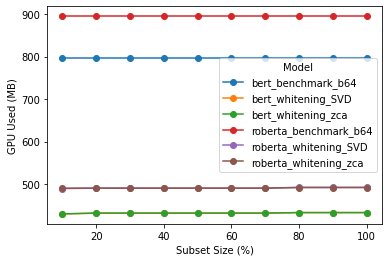

In [4]:
visualize_gpu_memory(df_total)

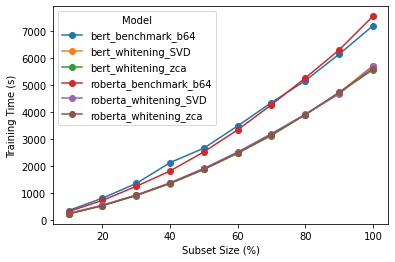

In [5]:
visualize_train_time(df_total)

In [1]:
import torch
from torch import nn
from torch.nn import CrossEntropyLoss, MSELoss
import torch.nn.functional as F

In [5]:
model_path = 'save/ag-news-bert-whitening/ag-news-bert-whitening-ZCA/best_model_0.th'
state_dict = torch.load(model_path)

In [6]:
# Inspect the state dictionary
print("State Dictionary keys:", state_dict.keys())

# You can inspect individual keys and their contents
# For example, if you want to see the shape and type of the tensors in a model's state dictionary
for key in state_dict:
    tensor = state_dict[key]
    print(f"{key}: shape = {tensor.shape}, dtype = {tensor.dtype}")

State Dictionary keys: odict_keys(['classifier.1.lstm.weight_ih_l0', 'classifier.1.lstm.weight_hh_l0', 'classifier.1.lstm.bias_ih_l0', 'classifier.1.lstm.bias_hh_l0', 'classifier.1.lstm.weight_ih_l0_reverse', 'classifier.1.lstm.weight_hh_l0_reverse', 'classifier.1.lstm.bias_ih_l0_reverse', 'classifier.1.lstm.bias_hh_l0_reverse', 'classifier.1.lstm.weight_ih_l1', 'classifier.1.lstm.weight_hh_l1', 'classifier.1.lstm.bias_ih_l1', 'classifier.1.lstm.bias_hh_l1', 'classifier.1.lstm.weight_ih_l1_reverse', 'classifier.1.lstm.weight_hh_l1_reverse', 'classifier.1.lstm.bias_ih_l1_reverse', 'classifier.1.lstm.bias_hh_l1_reverse', 'classifier.2.weight', 'classifier.2.bias'])
classifier.1.lstm.weight_ih_l0: shape = torch.Size([128, 256]), dtype = torch.float32
classifier.1.lstm.weight_hh_l0: shape = torch.Size([128, 32]), dtype = torch.float32
classifier.1.lstm.bias_ih_l0: shape = torch.Size([128]), dtype = torch.float32
classifier.1.lstm.bias_hh_l0: shape = torch.Size([128]), dtype = torch.float32

In [11]:
model_path = 'save/ag-news-bert-whitening/ag-news-bert-whitening-zca-modified/best_model_0.th'
state_dict = torch.load(model_path)

In [12]:
# Inspect the state dictionary
print("State Dictionary keys:", state_dict.keys())

# You can inspect individual keys and their contents
# For example, if you want to see the shape and type of the tensors in a model's state dictionary
for key in state_dict:
    tensor = state_dict[key]
    print(f"{key}: shape = {tensor.shape}, dtype = {tensor.dtype}")

State Dictionary keys: odict_keys(['classifier.1.lstm.weight_ih_l0', 'classifier.1.lstm.weight_hh_l0', 'classifier.1.lstm.bias_ih_l0', 'classifier.1.lstm.bias_hh_l0', 'classifier.1.lstm.weight_ih_l0_reverse', 'classifier.1.lstm.weight_hh_l0_reverse', 'classifier.1.lstm.bias_ih_l0_reverse', 'classifier.1.lstm.bias_hh_l0_reverse', 'classifier.1.lstm.weight_ih_l1', 'classifier.1.lstm.weight_hh_l1', 'classifier.1.lstm.bias_ih_l1', 'classifier.1.lstm.bias_hh_l1', 'classifier.1.lstm.weight_ih_l1_reverse', 'classifier.1.lstm.weight_hh_l1_reverse', 'classifier.1.lstm.bias_ih_l1_reverse', 'classifier.1.lstm.bias_hh_l1_reverse', 'classifier.2.weight', 'classifier.2.bias'])
classifier.1.lstm.weight_ih_l0: shape = torch.Size([128, 256]), dtype = torch.float32
classifier.1.lstm.weight_hh_l0: shape = torch.Size([128, 32]), dtype = torch.float32
classifier.1.lstm.bias_ih_l0: shape = torch.Size([128]), dtype = torch.float32
classifier.1.lstm.bias_hh_l0: shape = torch.Size([128]), dtype = torch.float32